# `stat_summary_bin()`

In [1]:
import pandas as pd

from lets_plot import *


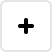
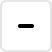
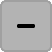
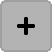
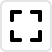
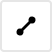
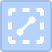
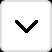
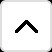
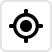

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(df.shape)
df.head()

(150, 5)


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### 1. `geom` parameter

In [4]:
ggplot(df, aes("petal_length", "sepal_length")) + \
    stat_summary_bin(geom='crossbar', width=1, binwidth=.5) + \
    geom_point(shape=21, color="black", fill="white")

### 2. `fun`, `fun_min`, `fun_max`

In [5]:
ggplot(df, aes("petal_length", "sepal_length")) + \
    stat_summary_bin(geom='crossbar', width=1, binwidth=.5, \
                     fun='mq', fun_min='lq', fun_max='uq') + \
    geom_point(shape=21, color="black", fill="white")

### 3. `quantiles` parameter

In [6]:
ggplot(df, aes("petal_length", "sepal_length")) + \
    stat_summary_bin(geom='crossbar', width=1, binwidth=.5, \
                     fun='mq', fun_min='lq', fun_max='uq', \
                     quantiles=[.05, .5, .95]) + \
    geom_point(shape=21, color="black", fill="white")

### 4. `center` and `boundary` parameters

In [7]:
def get_plot(center=None, boundary=None):
    return ggplot(df, aes("petal_length", "sepal_length")) + \
        stat_summary_bin(geom='crossbar', width=1, binwidth=.5, \
                         center=center, boundary=boundary) + \
        geom_point(shape=21, color="black", fill="white") + \
        ggtitle("center={0}, boundary={1}".format(center, boundary))

gggrid([
    get_plot(),
    get_plot(center=1),
    get_plot(boundary=1),
], ncol=2)

### 5. Custom Calculations in Aesthetics

In [8]:
ggplot(df, aes("petal_length", "sepal_length")) + \
    stat_summary_bin(aes(middle='..median..', fill='..count..'), \
                     geom='crossbar', width=1, binwidth=.5, \
                     fatten=5, color="white") + \
    geom_point(shape=21, color="black", fill="white")